# Plotting with seaborn

ScmData provides limited support for plotting. However, we make it as easy as possible to return data in a format which can be used with the [seaborn](https://seaborn.pydata.org/index.html) plotting library. Given the power of this library, we recommend having a look through its documentation if you want to make anything more than the most basic plots.

In [1]:
# NBVAL_IGNORE_OUTPUT
import matplotlib.pyplot as plt
import seaborn as sns
from scmdata.run import ScmRun
from scmdata.plotting import RCMIP_SCENARIO_COLOURS

## Data

For this notebook we use the RCMIP radiative forcings, available at rcmip.org.

In [2]:
# NBVAL_IGNORE_OUTPUT
rcmip_db = ScmRun("rcmip-radiative-forcing-annual-means-v4-0-0.csv")
rcmip_db.head()

time                                                                                                   1750-01-01 00:00:00  \
activity_id    mip_era model region scenario unit  variable                                                                  
not_applicable CMIP5   AIM   World  rcp60    W/m^2 Radiative Forcing                                                   NaN   
                                                   Radiative Forcing|Anthropogenic                                     NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols                            NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aeroso...                  NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aeroso...                  NaN   

time                                                                                                   1751-01-01 00:00:00  \
activity_id    mip_era model region scenario unit  variable                                                                  
not_applicable CMIP5   AIM   World  rcp60    W/m^2 Radiative Forcing                                                   NaN   
                                                   Radiative Forcing|Anthropogenic                                     NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols                            NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aeroso...                  NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aeroso...                  NaN   

time                                                                                                   1752-01-01 00:00:00  \
activity_id    mip_era model region scenario unit  variable                                                                  
not_applicable CMIP5   AIM   World  rcp60    W/m^2 Radiative Forcing                                                   NaN   
                                                   Radiative Forcing|Anthropogenic                                     NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols                            NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aeroso...                  NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aeroso...                  NaN   

time                                                                                                   1753-01-01 00:00:00  \
activity_id    mip_era model region scenario unit  variable                                                                  
not_applicable CMIP5   AIM   World  rcp60    W/m^2 Radiative Forcing                                                   NaN   
                                                   Radiative Forcing|Anthropogenic                                     NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols                            NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aeroso...                  NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aeroso...                  NaN   

time                                                                                                   1754-01-01 00:00:00  \
activity_id    mip_era model region scenario unit  variable                                                                  
not_applicable CMIP5   AIM   World  rcp60    W/m^2 Radiative Forcing                                                   NaN   
                                                   Radiative Forcing|Anthropogenic        

## Plotting with ScmRun

For the most common plotting patterns, we provide a very simple `lineplot` method in `ScmRun`.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

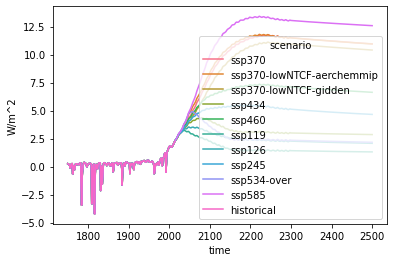

In [3]:
# NBVAL_IGNORE_OUTPUT
out = rcmip_db.filter(variable="Effective Radiative Forcing").lineplot()
out

``kwargs`` passed to this method are given directly to [``seaborn.lineplot``](https://seaborn.pydata.org/generated/seaborn.lineplot.html), which allows an extra layer of control.

For example, we can plot on slightly bigger axes, make the lines slightly transparent, add markers for the different models, specify the colour to use for each scenario and specify the order to display the scenarios in.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

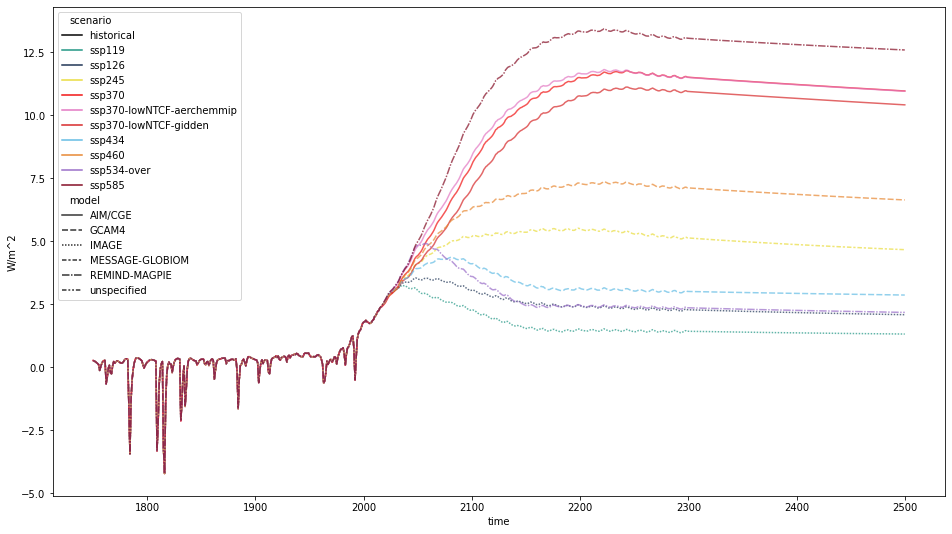

In [4]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(16, 9)).add_subplot(111)
rcmip_db.filter(variable="Effective Radiative Forcing").lineplot(
    ax=ax,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    style="model",
    alpha=0.7,
)

### Specifying the time axis

Plotting with a `datetime.datetime` time axis is not always convenient. To address this, we provide the `time_axis` keyword argument. The options are available in the `lineplot` docstring.

In [5]:
print(rcmip_db.lineplot.__doc__)


    Make a line plot via `seaborn's lineplot
    <https://seaborn.pydata.org/generated/seaborn.lineplot.html>`_

    If only a single unit is present, it will be used as the y-axis label.
    The axis object is returned so this can be changed by the user if desired.

    Parameters
    ----------
    time_axis : {None, "year", "year-month", "days since 1970-01-01", "seconds since 1970-01-01"}  # noqa: E501
        Time axis to use for the plot.

        If ``None``, :class:`datetime.datetime` objects will be used.

        If ``"year"``, the year of each time point  will be used.

        If ``"year-month"``, the year plus (month - 0.5) / 12  will be used.

        If ``"days since 1970-01-01"``, the number of days since 1st Jan 1970 will be
        used (calculated using the :mod:`datetime` module).

        If ``"seconds since 1970-01-01"``, the number of seconds  since 1st Jan 1970 will
        be used (calculated using the :mod:`datetime` module).

    **kwargs
        Keyword arg

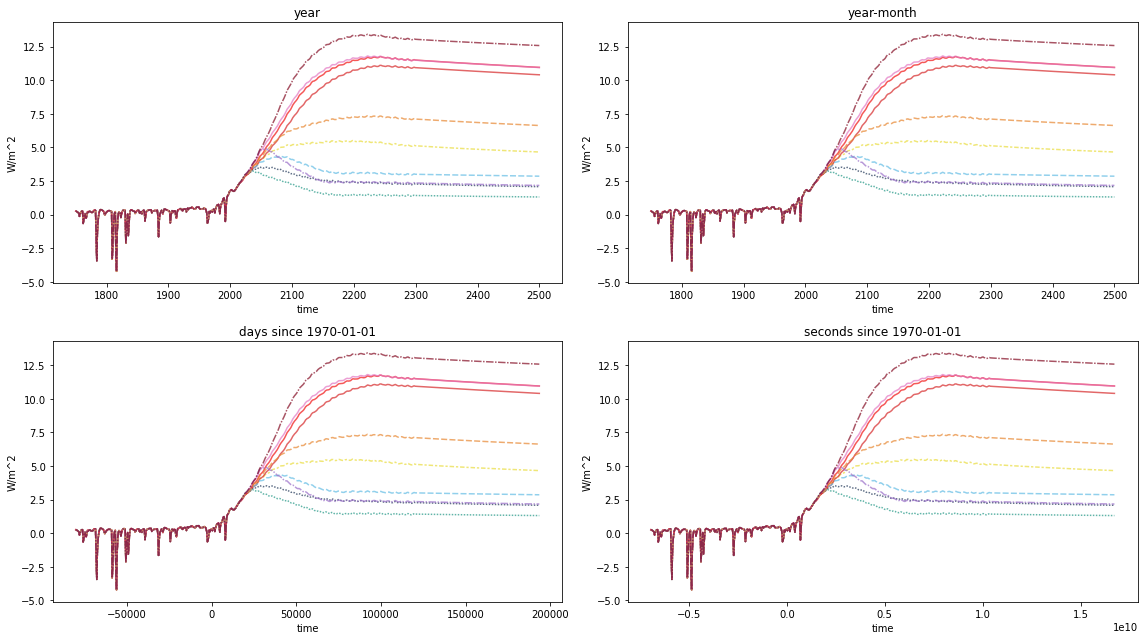

In [6]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(16, 9), nrows=2, ncols=2)

pdb = rcmip_db.filter(variable="Effective Radiative Forcing")
for ax, time_axis in zip(
    axes.flatten(),
    [
        "year",
        "year-month",
        "days since 1970-01-01",
        "seconds since 1970-01-01",
    ],
):
    pdb.lineplot(
        ax=ax,
        hue="scenario",
        palette=RCMIP_SCENARIO_COLOURS,
        hue_order=RCMIP_SCENARIO_COLOURS.keys(),
        style="model",
        alpha=0.7,
        time_axis=time_axis,
        legend=False,
    )
    ax.set_title(time_axis)

plt.tight_layout()

These same options can also be passed to the `timeseries` and `long_data` methods.

In [7]:
# NBVAL_IGNORE_OUTPUT
rcmip_db.timeseries(time_axis="year-month")

time                                                                                                                 1750.041667  \
activity_id    mip_era model       region scenario         unit  variable                                                          
not_applicable CMIP5   AIM         World  rcp60            W/m^2 Radiative Forcing                                           NaN   
                                                                 Radiative Forcing|Anthropogenic                             NaN   
                                                                 Radiative Forcing|Anthropogenic|Aerosols                    NaN   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aeroso...          NaN   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aeroso...          NaN   
...                                                                                                                          ...   
                       unspecified World  historical-cmip5 W/m^2 Radiative Forcing|Anthropogenic|Stratospheric O...          NaN   
                                                                 Radiative Forcing|Anthropogenic|Tropospheric Ozone          NaN   
                                                                 Radiative Forcing|Natural                                   NaN   
                                                                 Radiative Forcing|Natural|Solar                             NaN   
                                                                 Radiative Forcing|Natural|Volcanic                          NaN   

time                                                                                                                 1751.041667  \
activity_id    mip_era model       region scenario         unit  variable                                                          
not_applicable CMIP5   AIM         World  rcp60            W/m^2 Radiative Forcing                                           NaN   
                                                                 Radiative Forcing|Anthropogenic                             NaN   
                                                                 Radiative Forcing|Anthropogenic|Aerosols                    NaN   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aeroso...          NaN   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aeroso...          NaN   
...                                                                                                                          ...   
                       unspecified World  historical-cmip5 W/m^2 Radiative Forcing|Anthropogenic|Stratospheric O...          NaN   
                                                                 Radiative Forcing|Anthropogenic|Tropospheric Ozone          NaN   
                                                                 Radiative Forcing|Natural                                   NaN   
                                                                 Radiative Forcing|Natural|Solar                             NaN   
                                                                 Radiative Forcing|Natural|Volcanic                          NaN   

time                                                                                                                 1752.041667  \
activity_id    mip_era model       region scenario         unit  variable                                                          
not_applicable CMIP5   AIM         World  rcp60            W/m^2 Radiative Forcing                                           NaN   
                                                                 Radiative Forcing|Anthropogenic                             NaN   
                                      

In [8]:
# NBVAL_IGNORE_OUTPUT
rcmip_db.long_data(time_axis="days since 1970-01-01")

,activity_id,mip_era,model,region,scenario,unit,variable,time,value
0,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-74874,0.000000
1,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-74509,0.126027
2,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-74144,0.273031
3,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-73779,0.278871
4,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-73413,0.242045
...,...,...,...,...,...,...,...,...,...
332450,not_applicable,CMIP5,unspecified,World,historical-cmip5,W/m^2,Radiative Forcing|Natural|Volcanic,11323,0.232444
332451,not_applicable,CMIP5,unspecified,World,historical-cmip5,W/m^2,Radiative Forcing|Natural|Volcanic,11688,0.232444
332452,not_applicable,CMIP5,unspecified,World,historical-cmip5,W/m^2,Radiative Forcing|Natural|Volcanic,12053,0.232444
332453,not_applicable,CMIP5,unspecified,World,historical-cmip5,W/m^2,Radiative Forcing|Natural|Volcanic,12418,0.232444


## Plotting with seaborn

If you wish to make plots which are more complex than this most basic pattern, a combination of seaborn and pandas reshaping is your best bet.

### Plotting on a grid

Often we wish to look at lots of different variables at once. Seaborn allows this sort of 'gridded' plotting, as shown below.

In [9]:
vars_to_plot = ["Effective Radiative Forcing"] + [
    "Effective Radiative Forcing|{}".format(v)
    for v in [
        "Anthropogenic",
        "Anthropogenic|Aerosols",
        "Anthropogenic|CO2",
        "Anthropogenic|CH4",
        "Anthropogenic|N2O",
    ]
]
vars_to_plot

['Effective Radiative Forcing',
 'Effective Radiative Forcing|Anthropogenic',
 'Effective Radiative Forcing|Anthropogenic|Aerosols',
 'Effective Radiative Forcing|Anthropogenic|CO2',
 'Effective Radiative Forcing|Anthropogenic|CH4',
 'Effective Radiative Forcing|Anthropogenic|N2O']

In [10]:
# NBVAL_IGNORE_OUTPUT
seaborn_df = rcmip_db.filter(variable=vars_to_plot).long_data()
seaborn_df.head()

,activity_id,mip_era,model,region,scenario,unit,variable,time,value
0,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1750-01-01 00:00:00,0.259367
1,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1751-01-01 00:00:00,0.242788
2,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1752-01-01 00:00:00,0.214656
3,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1753-01-01 00:00:00,0.179488
4,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1754-01-01 00:00:00,0.145354


With the output of `.long_data()` we can directly use [``seaborn.relplot``](https://seaborn.pydata.org/generated/seaborn.relplot.html).

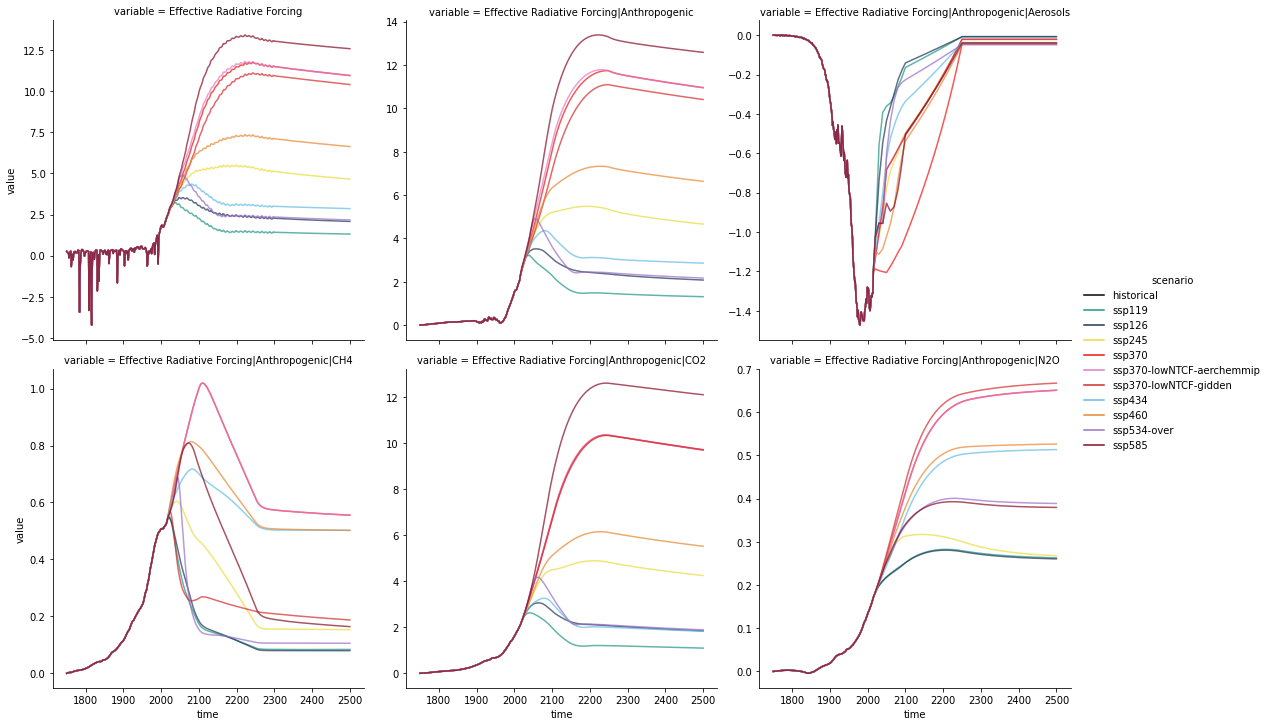

In [11]:
# NBVAL_IGNORE_OUTPUT
sns.relplot(
    data=seaborn_df,
    x="time",
    y="value",
    col="variable",
    col_wrap=3,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    alpha=0.7,
    facet_kws={"sharey": False},
    kind="line",
)

### Variable scatter plots

Sometimes we don't want to plot against time, rather we want to plot variables against each other. For example, we might want to see how the effective radiative forcings relate to each other in the different scenarios. In such a case we can reshape the data using pandas before using seaborn.

In [12]:
# NBVAL_IGNORE_OUTPUT
ts = rcmip_db.filter(variable=vars_to_plot[:4]).timeseries()
ts.head()

time                                                                                                                      1750-01-01 00:00:00  \
activity_id    mip_era model   region scenario                  unit  variable                                                                  
not_applicable CMIP6   AIM/CGE World  ssp370                    W/m^2 Effective Radiative Forcing                                    0.259367   
                                                                      Effective Radiative Forcing|Anthropogenic                      0.000000   
                                                                      Effective Radiative Forcing|Anthropogenic|Aerosols             0.000000   
                                                                      Effective Radiative Forcing|Anthropogenic|CO2                  0.000000   
                                      ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing                                    0.259367   

time                                                                                                                      1751-01-01 00:00:00  \
activity_id    mip_era model   region scenario                  unit  variable                                                                  
not_applicable CMIP6   AIM/CGE World  ssp370                    W/m^2 Effective Radiative Forcing                                    0.242788   
                                                                      Effective Radiative Forcing|Anthropogenic                      0.001756   
                                                                      Effective Radiative Forcing|Anthropogenic|Aerosols             0.000836   
                                                                      Effective Radiative Forcing|Anthropogenic|CO2                  0.000824   
                                      ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing                                    0.242788   

time                                                                                                                      1752-01-01 00:00:00  \
activity_id    mip_era model   region scenario                  unit  variable                                                                  
not_applicable CMIP6   AIM/CGE World  ssp370                    W/m^2 Effective Radiative Forcing                                    0.214656   
                                                                      Effective Radiative Forcing|Anthropogenic                      0.003698   
                                                                      Effective Radiative Forcing|Anthropogenic|Aerosols             0.001212   
                                                                      Effective Radiative Forcing|Anthropogenic|CO2                  0.001647   
                                      ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing                                    0.214656   

time                                                                                                                      1753-01-01 00:00:00  \
activity_id    mip_era model   region scenario                  unit  variable                                                                  
not_applicable CMIP6   AIM/CGE World  ssp370                    W/m^2 Effective Radiative Forcing                                    0.179488   
                                                                      Effective Radiative Forcing|Anthropogenic                      0.004707   
                                                                      Effective Radiative Forcing|Anthropogenic|Aerosols             0.000801   
                                                                      Effective Radiative Forcing|Anthropogenic|CO2                  0.002330   
                                      ssp370-lowNTCF-aerchemmip W/m^2 Effective Ra

In [13]:
# NBVAL_IGNORE_OUTPUT
ts_reshaped = ts.unstack("variable").stack("time").reset_index("scenario")
ts_reshaped.head()

variable                                                        scenario  \
activity_id    mip_era model   region unit  time                           
not_applicable CMIP6   AIM/CGE World  W/m^2 1750-01-01 00:00:00   ssp370   
                                            1751-01-01 00:00:00   ssp370   
                                            1752-01-01 00:00:00   ssp370   
                                            1753-01-01 00:00:00   ssp370   
                                            1754-01-01 00:00:00   ssp370   

variable                                                         Effective Radiative Forcing  \
activity_id    mip_era model   region unit  time                                               
not_applicable CMIP6   AIM/CGE World  W/m^2 1750-01-01 00:00:00                     0.259367   
                                            1751-01-01 00:00:00                     0.242788   
                                            1752-01-01 00:00:00                     0.214656   
                                            1753-01-01 00:00:00                     0.179488   
                                            1754-01-01 00:00:00                     0.145354   

variable                                                         Effective Radiative Forcing|Anthropogenic  \
activity_id    mip_era model   region unit  time                                                             
not_applicable CMIP6   AIM/CGE World  W/m^2 1750-01-01 00:00:00                                   0.000000   
                                            1751-01-01 00:00:00                                   0.001756   
                                            1752-01-01 00:00:00                                   0.003698   
                                            1753-01-01 00:00:00                                   0.004707   
                                            1754-01-01 00:00:00                                   0.004987   

variable                                                         Effective Radiative Forcing|Anthropogenic|Aerosols  \
activity_id    mip_era model   region unit  time                                                                      
not_applicable CMIP6   AIM/CGE World  W/m^2 1750-01-01 00:00:00                                           0.000000    
                                            1751-01-01 00:00:00                                           0.000836    
                                            1752-01-01 00:00:00                                           0.001212    
                                            1753-01-01 00:00:00                                           0.000801    
                                            1754-01-01 00:00:00                                          -0.000571    

variable                                                         Effective Radiative Forcing|Anthropogenic|CO2  
activity_id    mip_era model   region unit  time                                                                
not_applicable CMIP6   AIM/CGE World  W/m^2 1750-01-01 00:00:00                                       0.000000  
                                            1751-01-01 00:00:00                                       0.000824  
                                            1752-01-01 00:00:00                                       0.001647  
                                            1753-01-01 00:00:00                                       0.002330  
                                            1754-01-01 00:00:00                                       0.003153

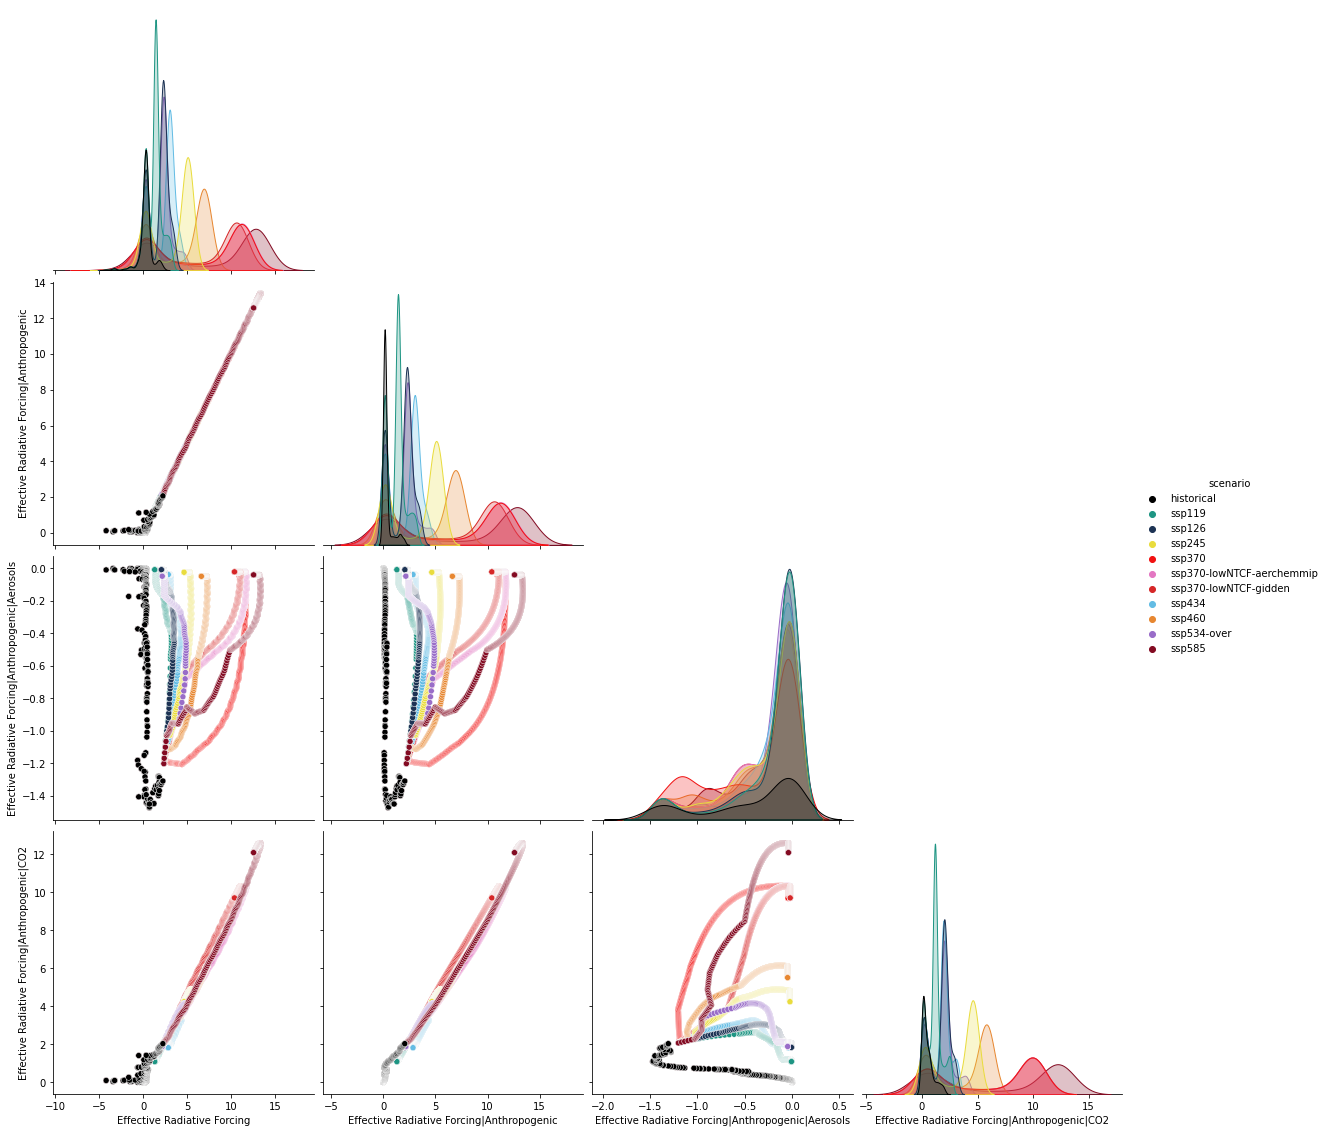

In [14]:
# NBVAL_IGNORE_OUTPUT
sns.pairplot(
    ts_reshaped,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    corner=True,
    height=4,
)